Prep
---

--- train test splitting code ---

--- currently formatted as markdown so it does't accidently run ---

import os
import random
import shutil
random.seed(24)
for classification in ['1_Parasitized', '0_Uninfected']:
    source_folder = f"Data/cell_images/{classification}"
    cell_images = [f for f in os.listdir(source_folder) if f.endswith('.png')]
    random.shuffle(cell_images)
    train_test_idx = int(len(cell_images) * 0.8)
    train_files = cell_images[:train_test_idx]
    test_files = cell_images[train_test_idx:]
    for file in train_files:
        target_folder = f"Data/train_val/{classification}"
        shutil.copy(os.path.join(source_folder, file), os.path.join(target_folder, file))
    for file in test_files:
        target_folder = f"Data/test/{classification}"
        shutil.copy(os.path.join(source_folder, file), os.path.join(target_folder, file))

In [1]:
from keras.utils import set_random_seed
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# train / validation data
set_random_seed(24)
tv_datagen = ImageDataGenerator(rescale=1/255, validation_split=0.2)
train = tv_datagen.flow_from_directory(
    'Data/train_val/',
    target_size=(192, 192),
    batch_size=32,
    class_mode='binary',
    subset='training')
val = tv_datagen.flow_from_directory(
    'Data/train_val/',
    target_size=(192, 192),
    batch_size=32,
    class_mode='binary',
    subset='validation')
# testing data
test_datagen = ImageDataGenerator(rescale=1/255)
test = test_datagen.flow_from_directory(
    'Data/test/',
    target_size=(192, 192),
    batch_size=5512,
    class_mode='binary')

Found 17879 images belonging to 2 classes.
Found 4469 images belonging to 2 classes.
Found 5512 images belonging to 2 classes.


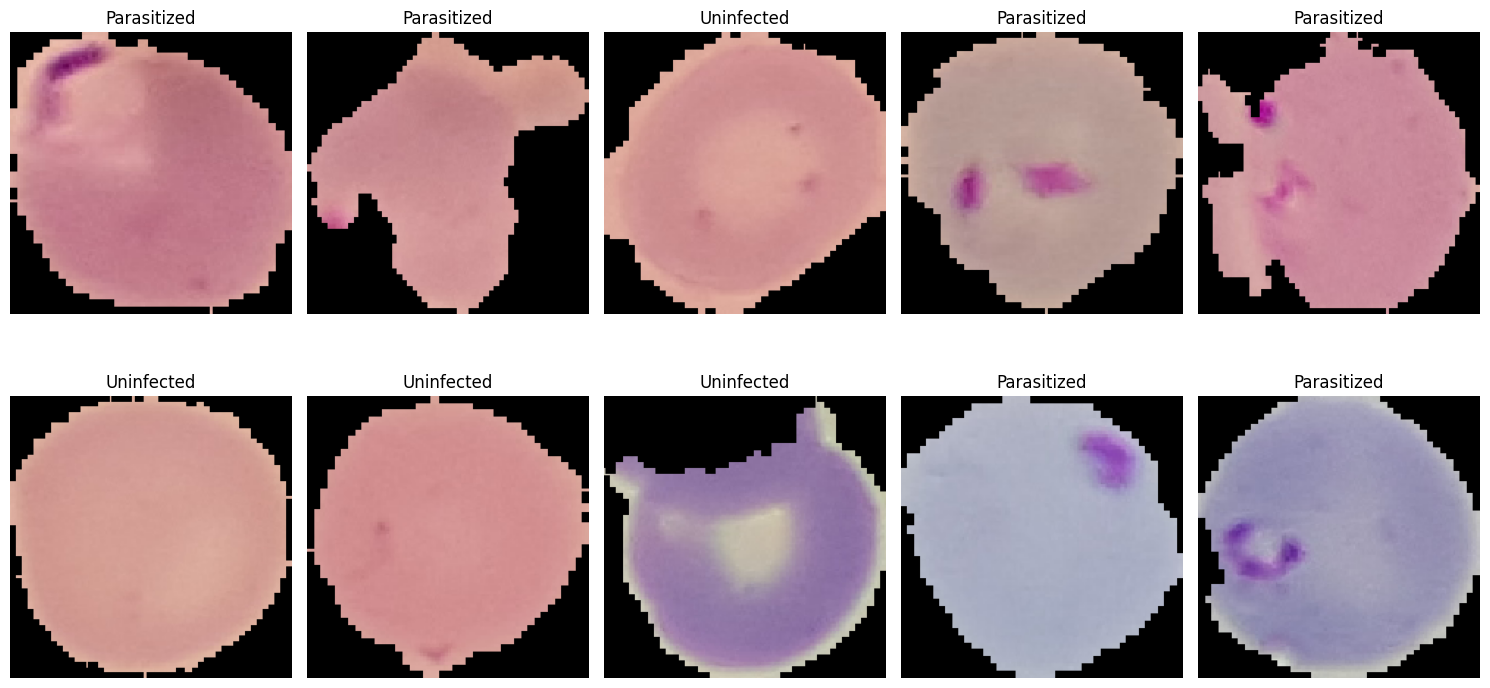

In [2]:
import numpy as np
import matplotlib.pyplot as plt
fig, axs = plt.subplots(2, 5, figsize=(15, 8))
for i, ax in enumerate(axs.flat):
    label = "Parasitized" if test[0][1][i] == 1 else "Uninfected"
    ax.imshow(test[0][0][i, :, :, :])
    ax.set_title(label)
    ax.axis('off')
plt.tight_layout()
plt.show()

Basic Neural Network
---

In [3]:
from keras import Sequential
from keras.layers import Input, Flatten, Dense
import warnings
warnings.filterwarnings("ignore")
# building model architecture
set_random_seed(24)
model_1 = Sequential()
model_1.add(Input(shape=(192, 192, 3)))

model_1.add(Flatten())
model_1.add(Dense(1, activation='sigmoid'))

print(model_1.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 110592)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │       110,593 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 110,593 (432.00 KB)

 Trainable params: 110,593 (432.00 KB)

 Non-trainable params: 0 (0.00 B)

None


In [4]:
from keras.callbacks import EarlyStopping
# compiling model
model_1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
early_stop = EarlyStopping(monitor='val_loss', patience=2)
fitting = model_1.fit(train,
                    validation_data=val,
                    epochs=15,
                    callbacks=early_stop)

Epoch 1/15
559/559 ━━━━━━━━━━━━━━━━━━━━ 19s 34ms/step - accuracy: 0.5625 - loss: 2.8011 - val_accuracy: 0.6174 - val_loss: 0.9503
Epoch 2/15
559/559 ━━━━━━━━━━━━━━━━━━━━ 14s 25ms/step - accuracy: 0.6043 - loss: 1.2398 - val_accuracy: 0.5608 - val_loss: 1.6614
Epoch 3/15
559/559 ━━━━━━━━━━━━━━━━━━━━ 14s 25ms/step - accuracy: 0.6130 - loss: 1.4792 - val_accuracy: 0.5117 - val_loss: 2.6892


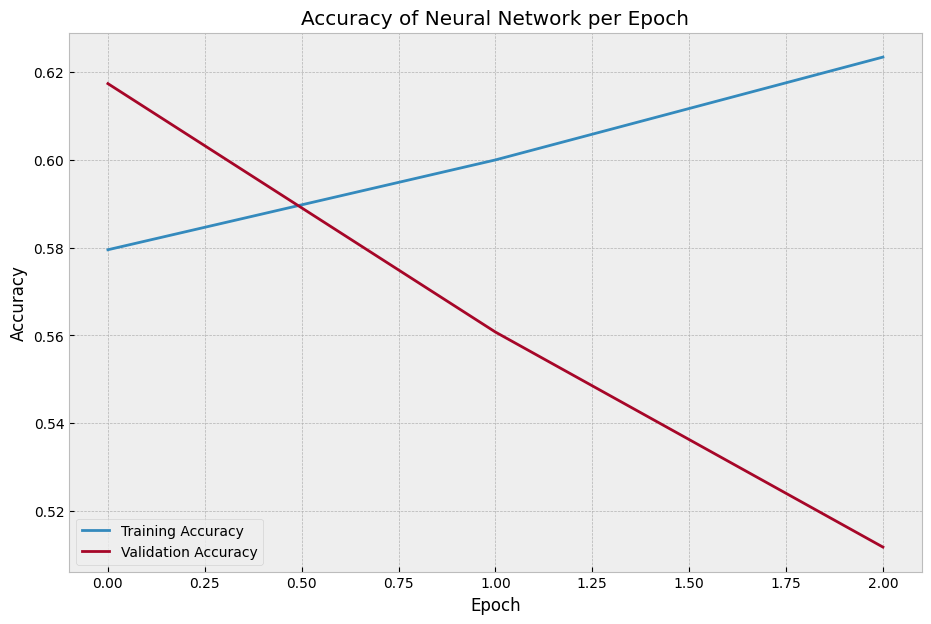

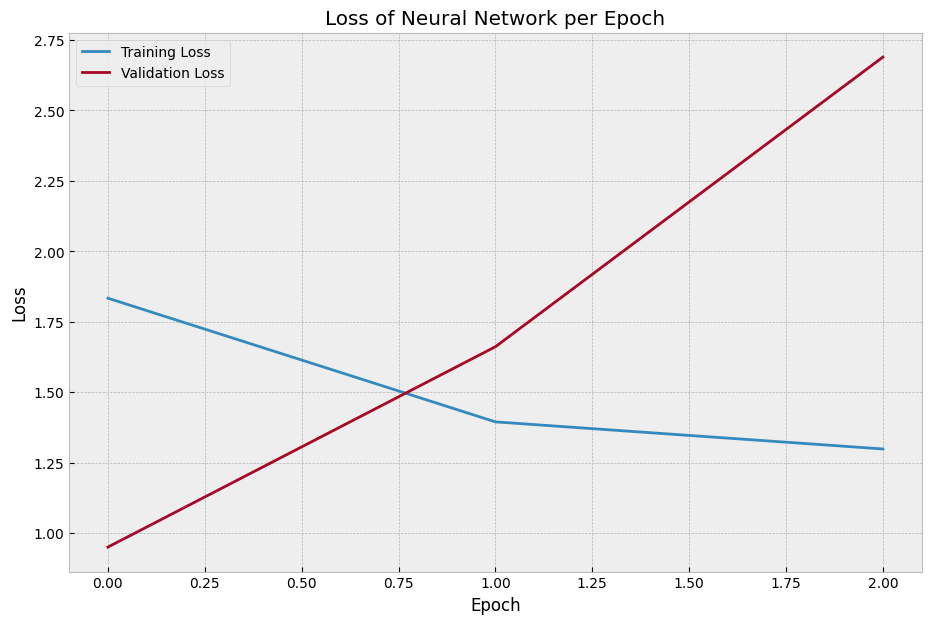

In [5]:
import seaborn as sns
plt.style.use("bmh")
# plotting the accuracy and loss of the model
plt.figure(figsize=(11,7))
sns.lineplot(fitting.history['accuracy'], label= "Training Accuracy")
sns.lineplot(fitting.history['val_accuracy'], label= "Validation Accuracy")
plt.title("Accuracy of Neural Network per Epoch")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()
plt.figure(figsize=(11,7))
sns.lineplot(fitting.history['loss'], label= "Training Loss")
sns.lineplot(fitting.history['val_loss'], label= "Validation Loss")
plt.title("Loss of Neural Network per Epoch")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

Adding Convolutional Layer
---

In [6]:
from keras.layers import Conv2D
# building model architecture
set_random_seed(24)
model_2 = Sequential()
model_2.add(Input(shape=(192, 192, 3)))

model_2.add(Conv2D(16,(3,3), activation='relu'))

model_2.add(Flatten())
model_2.add(Dense(1, activation='sigmoid'))

print(model_2.summary())

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 190, 190, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 577600)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │       577,601 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 578,049 (2.21 MB)

 Trainable params: 578,049 (2.21 MB)

 Non-trainable params: 0 (0.00 B)

None


In [7]:
# compiling model
model_2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
early_stop = EarlyStopping(monitor='val_loss', patience=2)
fitting = model_2.fit(train,
                    validation_data=val,
                    epochs=15,
                    callbacks=early_stop)

Epoch 1/15
559/559 ━━━━━━━━━━━━━━━━━━━━ 31s 55ms/step - accuracy: 0.6465 - loss: 1.0994 - val_accuracy: 0.7366 - val_loss: 0.5523
Epoch 2/15
559/559 ━━━━━━━━━━━━━━━━━━━━ 263s 471ms/step - accuracy: 0.8382 - loss: 0.4376 - val_accuracy: 0.7169 - val_loss: 0.5335
Epoch 3/15
559/559 ━━━━━━━━━━━━━━━━━━━━ 33s 58ms/step - accuracy: 0.9132 - loss: 0.3090 - val_accuracy: 0.7536 - val_loss: 0.5011
Epoch 4/15
559/559 ━━━━━━━━━━━━━━━━━━━━ 33s 59ms/step - accuracy: 0.9552 - loss: 0.1894 - val_accuracy: 0.7534 - val_loss: 0.5496
Epoch 5/15
559/559 ━━━━━━━━━━━━━━━━━━━━ 32s 57ms/step - accuracy: 0.9721 - loss: 0.1370 - val_accuracy: 0.7239 - val_loss: 0.6263


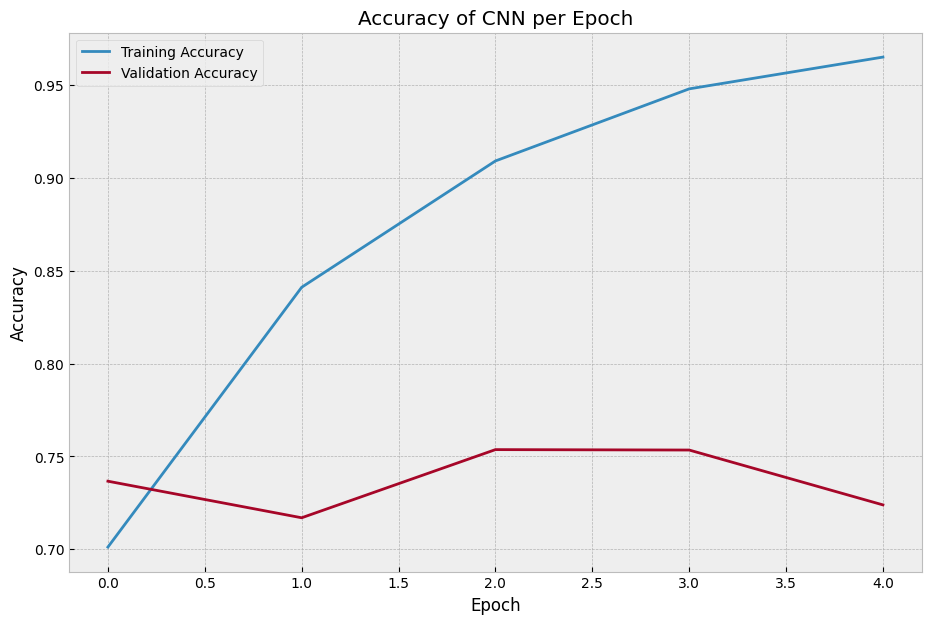

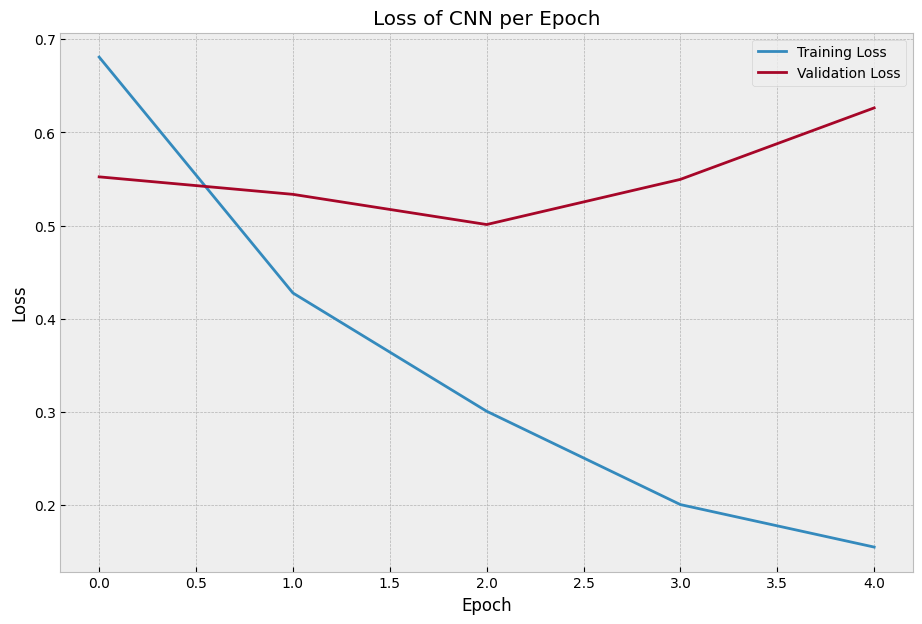

In [8]:
# plotting the accuracy and loss of the model
plt.figure(figsize=(11,7))
sns.lineplot(fitting.history['accuracy'], label= "Training Accuracy")
sns.lineplot(fitting.history['val_accuracy'], label= "Validation Accuracy")
plt.title("Accuracy of CNN per Epoch")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()
plt.figure(figsize=(11,7))
sns.lineplot(fitting.history['loss'], label= "Training Loss")
sns.lineplot(fitting.history['val_loss'], label= "Validation Loss")
plt.title("Loss of CNN per Epoch")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

Adding Dropout Layer
---

In [9]:
from keras.layers import Dropout
# building model architecture
set_random_seed(24)
model_3 = Sequential()
model_3.add(Input(shape=(192, 192, 3)))

model_3.add(Conv2D(16,(3,3), activation='relu'))
model_3.add(Dropout(0.1))

model_3.add(Flatten())
model_3.add(Dense(1, activation='sigmoid'))

print(model_3.summary())

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)               │ (None, 190, 190, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 190, 190, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 577600)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │       577,601 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 578,049 (2.21 MB)

 Trainable params: 578,049 (2.21 MB)

 Non-trainable params: 0 (0.00 B)

None


In [10]:
# compiling model
model_3.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
early_stop = EarlyStopping(monitor='val_loss', patience=2)
fitting = model_3.fit(train,
                    validation_data=val,
                    epochs=15,
                    callbacks=early_stop)

Epoch 1/15
559/559 ━━━━━━━━━━━━━━━━━━━━ 44s 77ms/step - accuracy: 0.6537 - loss: 1.8921 - val_accuracy: 0.7691 - val_loss: 0.5200
Epoch 2/15
559/559 ━━━━━━━━━━━━━━━━━━━━ 43s 76ms/step - accuracy: 0.8665 - loss: 0.3987 - val_accuracy: 0.7997 - val_loss: 0.4452
Epoch 3/15
559/559 ━━━━━━━━━━━━━━━━━━━━ 43s 77ms/step - accuracy: 0.9234 - loss: 0.2782 - val_accuracy: 0.8031 - val_loss: 0.5006
Epoch 4/15
559/559 ━━━━━━━━━━━━━━━━━━━━ 43s 77ms/step - accuracy: 0.9564 - loss: 0.1852 - val_accuracy: 0.7398 - val_loss: 0.5869


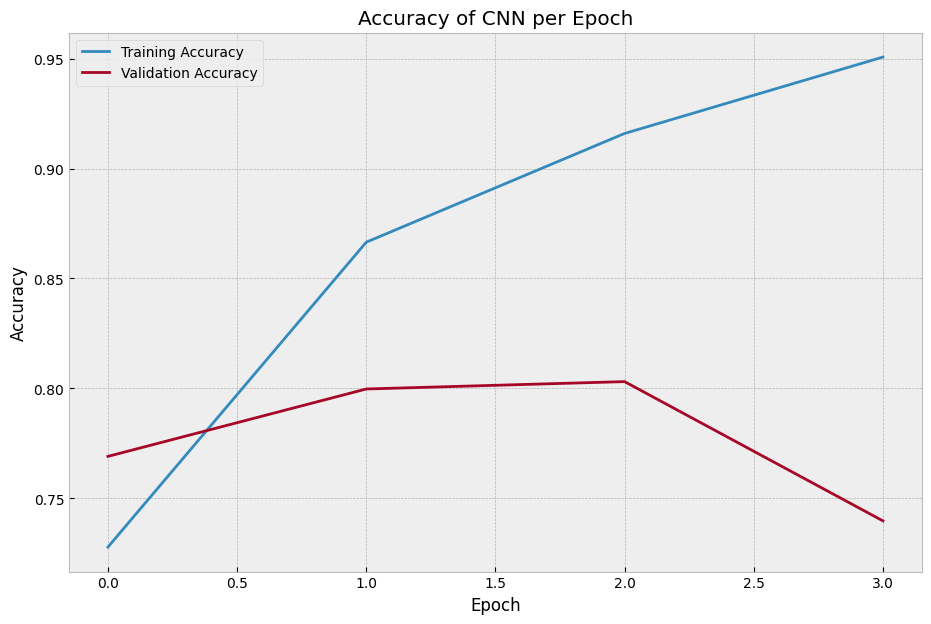

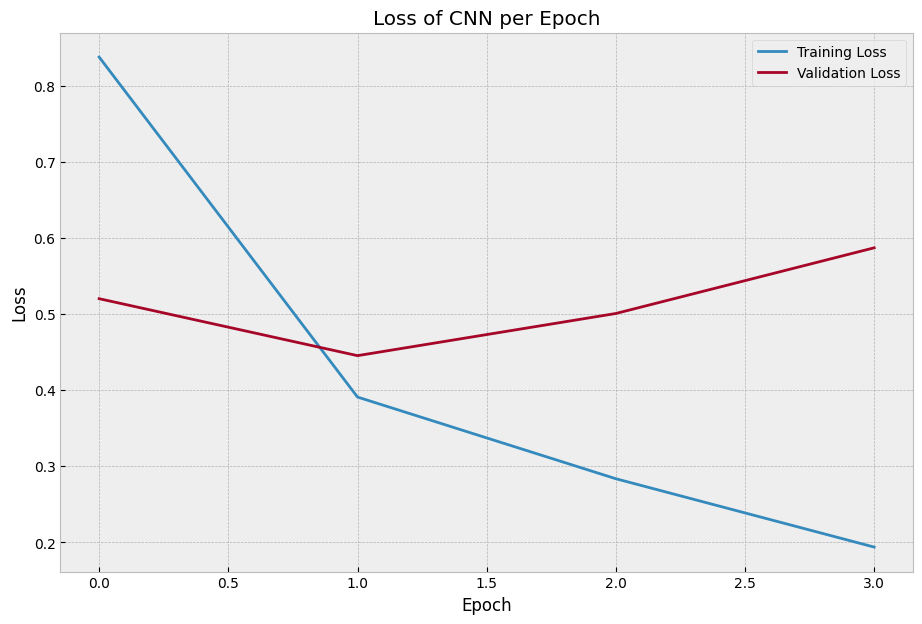

In [11]:
# plotting the accuracy and loss of the model
plt.figure(figsize=(11,7))
sns.lineplot(fitting.history['accuracy'], label= "Training Accuracy")
sns.lineplot(fitting.history['val_accuracy'], label= "Validation Accuracy")
plt.title("Accuracy of CNN per Epoch")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()
plt.figure(figsize=(11,7))
sns.lineplot(fitting.history['loss'], label= "Training Loss")
sns.lineplot(fitting.history['val_loss'], label= "Validation Loss")
plt.title("Loss of CNN per Epoch")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

Attempting to add additional dense layer
---

In [12]:
# building model architecture
set_random_seed(24)
model_4 = Sequential()
model_4.add(Input(shape=(192, 192, 3)))

model_4.add(Conv2D(16,(3,3), activation='relu'))
model_4.add(Dropout(0.1))

model_4.add(Flatten())
model_4.add(Dense(32, activation='relu'))
model_4.add(Dropout(0.2))

model_4.add(Dense(1, activation='sigmoid'))

print(model_4.summary())

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 190, 190, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 190, 190, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 577600)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 32)             │    18,483,232 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 18,483,713 (70.51 MB)

 Trainable params: 18,483,713 (70.51 MB)

 Non-trainable params: 0 (0.00 B)

None


Adding Max Pool Layer
---

In [13]:
from keras.layers import MaxPool2D
# building model architecture
set_random_seed(24)
model_5 = Sequential()
model_5.add(Input(shape=(192, 192, 3)))

model_5.add(Conv2D(16,(3,3), activation='relu'))
model_5.add(MaxPool2D(3,3))
model_5.add(Dropout(0.1))

model_5.add(Flatten())
model_5.add(Dense(32, activation='relu'))
model_5.add(Dropout(0.2))

model_5.add(Dense(1, activation='sigmoid'))

print(model_5.summary())

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 190, 190, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 63, 63, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 63504)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 32)             │     2,032,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,032,641 (7.75 MB)

 Trainable params: 2,032,641 (7.75 MB)

 Non-trainable params: 0 (0.00 B)

None


In [14]:
# compiling model
model_5.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
early_stop = EarlyStopping(monitor='val_loss', patience=2)
fitting = model_5.fit(train,
                    validation_data=val,
                    epochs=15,
                    callbacks=early_stop)

Epoch 1/15
559/559 ━━━━━━━━━━━━━━━━━━━━ 38s 67ms/step - accuracy: 0.6075 - loss: 0.6986 - val_accuracy: 0.7118 - val_loss: 0.5762
Epoch 2/15
559/559 ━━━━━━━━━━━━━━━━━━━━ 38s 68ms/step - accuracy: 0.7749 - loss: 0.4892 - val_accuracy: 0.8780 - val_loss: 0.3164
Epoch 3/15
559/559 ━━━━━━━━━━━━━━━━━━━━ 38s 67ms/step - accuracy: 0.8949 - loss: 0.2700 - val_accuracy: 0.8966 - val_loss: 0.2660
Epoch 4/15
559/559 ━━━━━━━━━━━━━━━━━━━━ 38s 67ms/step - accuracy: 0.9319 - loss: 0.1731 - val_accuracy: 0.8986 - val_loss: 0.2811
Epoch 5/15
559/559 ━━━━━━━━━━━━━━━━━━━━ 38s 67ms/step - accuracy: 0.9487 - loss: 0.1266 - val_accuracy: 0.9076 - val_loss: 0.2573
Epoch 6/15
559/559 ━━━━━━━━━━━━━━━━━━━━ 37s 66ms/step - accuracy: 0.9654 - loss: 0.0911 - val_accuracy: 0.9071 - val_loss: 0.2909
Epoch 7/15
559/559 ━━━━━━━━━━━━━━━━━━━━ 38s 67ms/step - accuracy: 0.9746 - loss: 0.0702 - val_accuracy: 0.8973 - val_loss: 0.3415


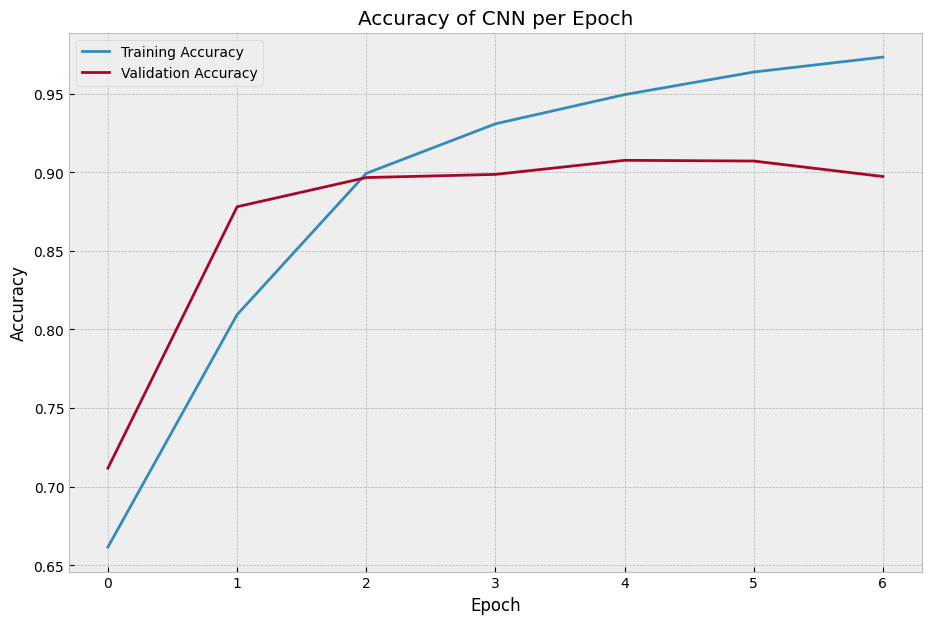

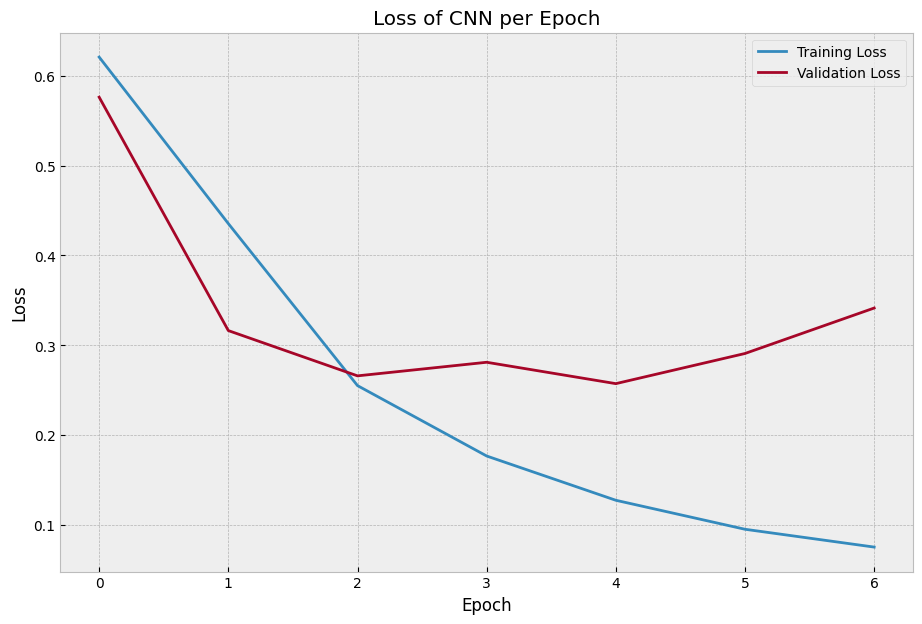

In [15]:
# plotting the accuracy and loss of the model
plt.figure(figsize=(11,7))
sns.lineplot(fitting.history['accuracy'], label= "Training Accuracy")
sns.lineplot(fitting.history['val_accuracy'], label= "Validation Accuracy")
plt.title("Accuracy of CNN per Epoch")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()
plt.figure(figsize=(11,7))
sns.lineplot(fitting.history['loss'], label= "Training Loss")
sns.lineplot(fitting.history['val_loss'], label= "Validation Loss")
plt.title("Loss of CNN per Epoch")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

Adding Additional Convolutional Layer
---

In [16]:
# building model architecture
set_random_seed(24)
model_6 = Sequential()
model_6.add(Input(shape=(192, 192, 3)))

model_6.add(Conv2D(16,(3,3), activation='relu'))
model_6.add(MaxPool2D(3,3))
model_6.add(Dropout(0.1))

model_6.add(Conv2D(32,(3,3), activation='relu'))
model_6.add(MaxPool2D(2,2))
model_6.add(Dropout(0.2))

model_6.add(Flatten())
model_6.add(Dense(64, activation='relu'))
model_6.add(Dropout(0.3))

model_6.add(Dense(1, activation='sigmoid'))

print(model_6.summary())

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 190, 190, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 63, 63, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 63, 63, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 61, 61, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 30, 30, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 28800)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 64)             │     1,843,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,848,417 (7.05 MB)

 Trainable params: 1,848,417 (7.05 MB)

 Non-trainable params: 0 (0.00 B)

None


In [17]:
# compiling model
model_6.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
early_stop = EarlyStopping(monitor='val_loss', patience=2)
fitting = model_6.fit(train,
                    validation_data=val,
                    epochs=15,
                    callbacks=early_stop)

Epoch 1/15
559/559 ━━━━━━━━━━━━━━━━━━━━ 52s 92ms/step - accuracy: 0.6102 - loss: 0.6767 - val_accuracy: 0.9215 - val_loss: 0.2945
Epoch 2/15
559/559 ━━━━━━━━━━━━━━━━━━━━ 51s 91ms/step - accuracy: 0.9087 - loss: 0.2775 - val_accuracy: 0.9326 - val_loss: 0.2067
Epoch 3/15
559/559 ━━━━━━━━━━━━━━━━━━━━ 51s 90ms/step - accuracy: 0.9326 - loss: 0.1976 - val_accuracy: 0.9313 - val_loss: 0.1891
Epoch 4/15
559/559 ━━━━━━━━━━━━━━━━━━━━ 51s 90ms/step - accuracy: 0.9442 - loss: 0.1670 - val_accuracy: 0.9304 - val_loss: 0.1901
Epoch 5/15
559/559 ━━━━━━━━━━━━━━━━━━━━ 51s 91ms/step - accuracy: 0.9440 - loss: 0.1501 - val_accuracy: 0.9286 - val_loss: 0.1914


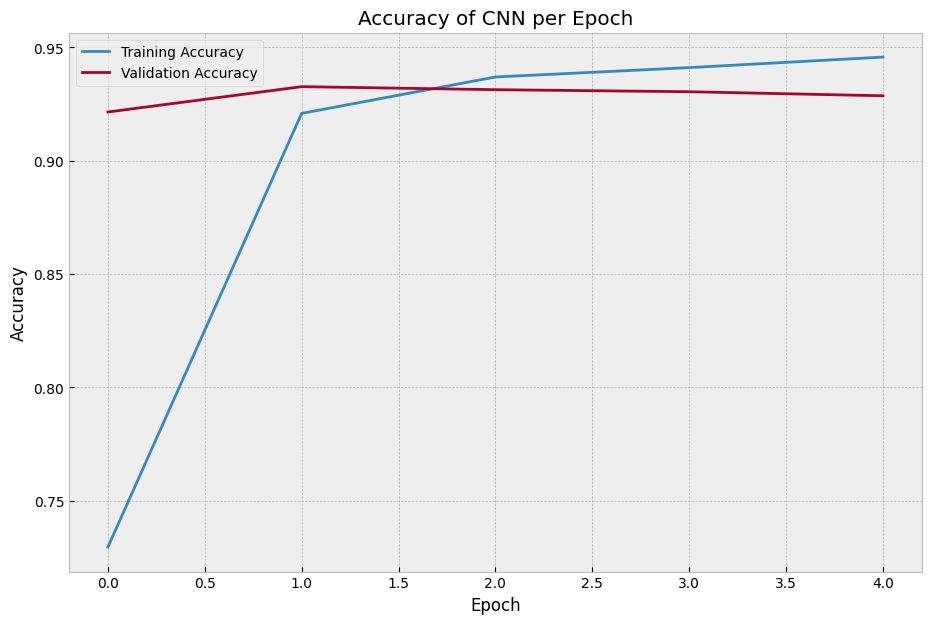

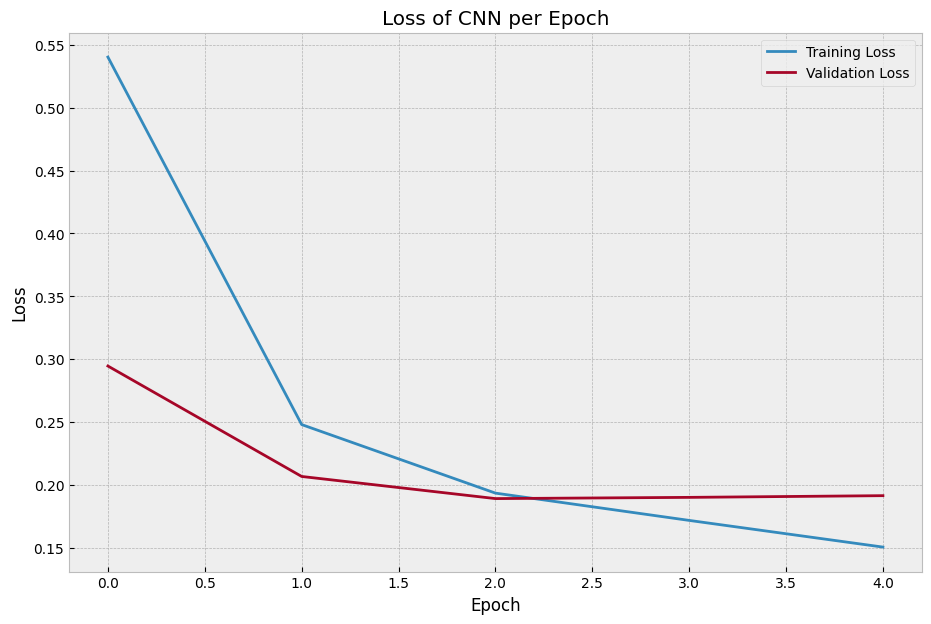

In [18]:
# plotting the accuracy and loss of the model
plt.figure(figsize=(11,7))
sns.lineplot(fitting.history['accuracy'], label= "Training Accuracy")
sns.lineplot(fitting.history['val_accuracy'], label= "Validation Accuracy")
plt.title("Accuracy of CNN per Epoch")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()
plt.figure(figsize=(11,7))
sns.lineplot(fitting.history['loss'], label= "Training Loss")
sns.lineplot(fitting.history['val_loss'], label= "Validation Loss")
plt.title("Loss of CNN per Epoch")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

Adding Additional Dense Layer
---

In [2]:
# building model architecture
set_random_seed(24)
model_7 = Sequential()
model_7.add(Input(shape=(192, 192, 3)))

model_7.add(Conv2D(16,(3,3), activation='relu'))
model_7.add(MaxPool2D(3,3))
model_7.add(Dropout(0.1))

model_7.add(Conv2D(32,(3,3), activation='relu'))
model_7.add(MaxPool2D(2,2))
model_7.add(Dropout(0.2))

model_7.add(Flatten())
model_7.add(Dense(64, activation='relu'))
model_7.add(Dropout(0.3))

model_7.add(Dense(32, activation='relu'))
model_7.add(Dropout(0.4))

model_7.add(Dense(1, activation='sigmoid'))

print(model_7.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 190, 190, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 63, 63, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 30, 30, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 28800)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │     1,843,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,850,465 (7.06 MB)

 Trainable params: 1,850,465 (7.06 MB)

 Non-trainable params: 0 (0.00 B)

None


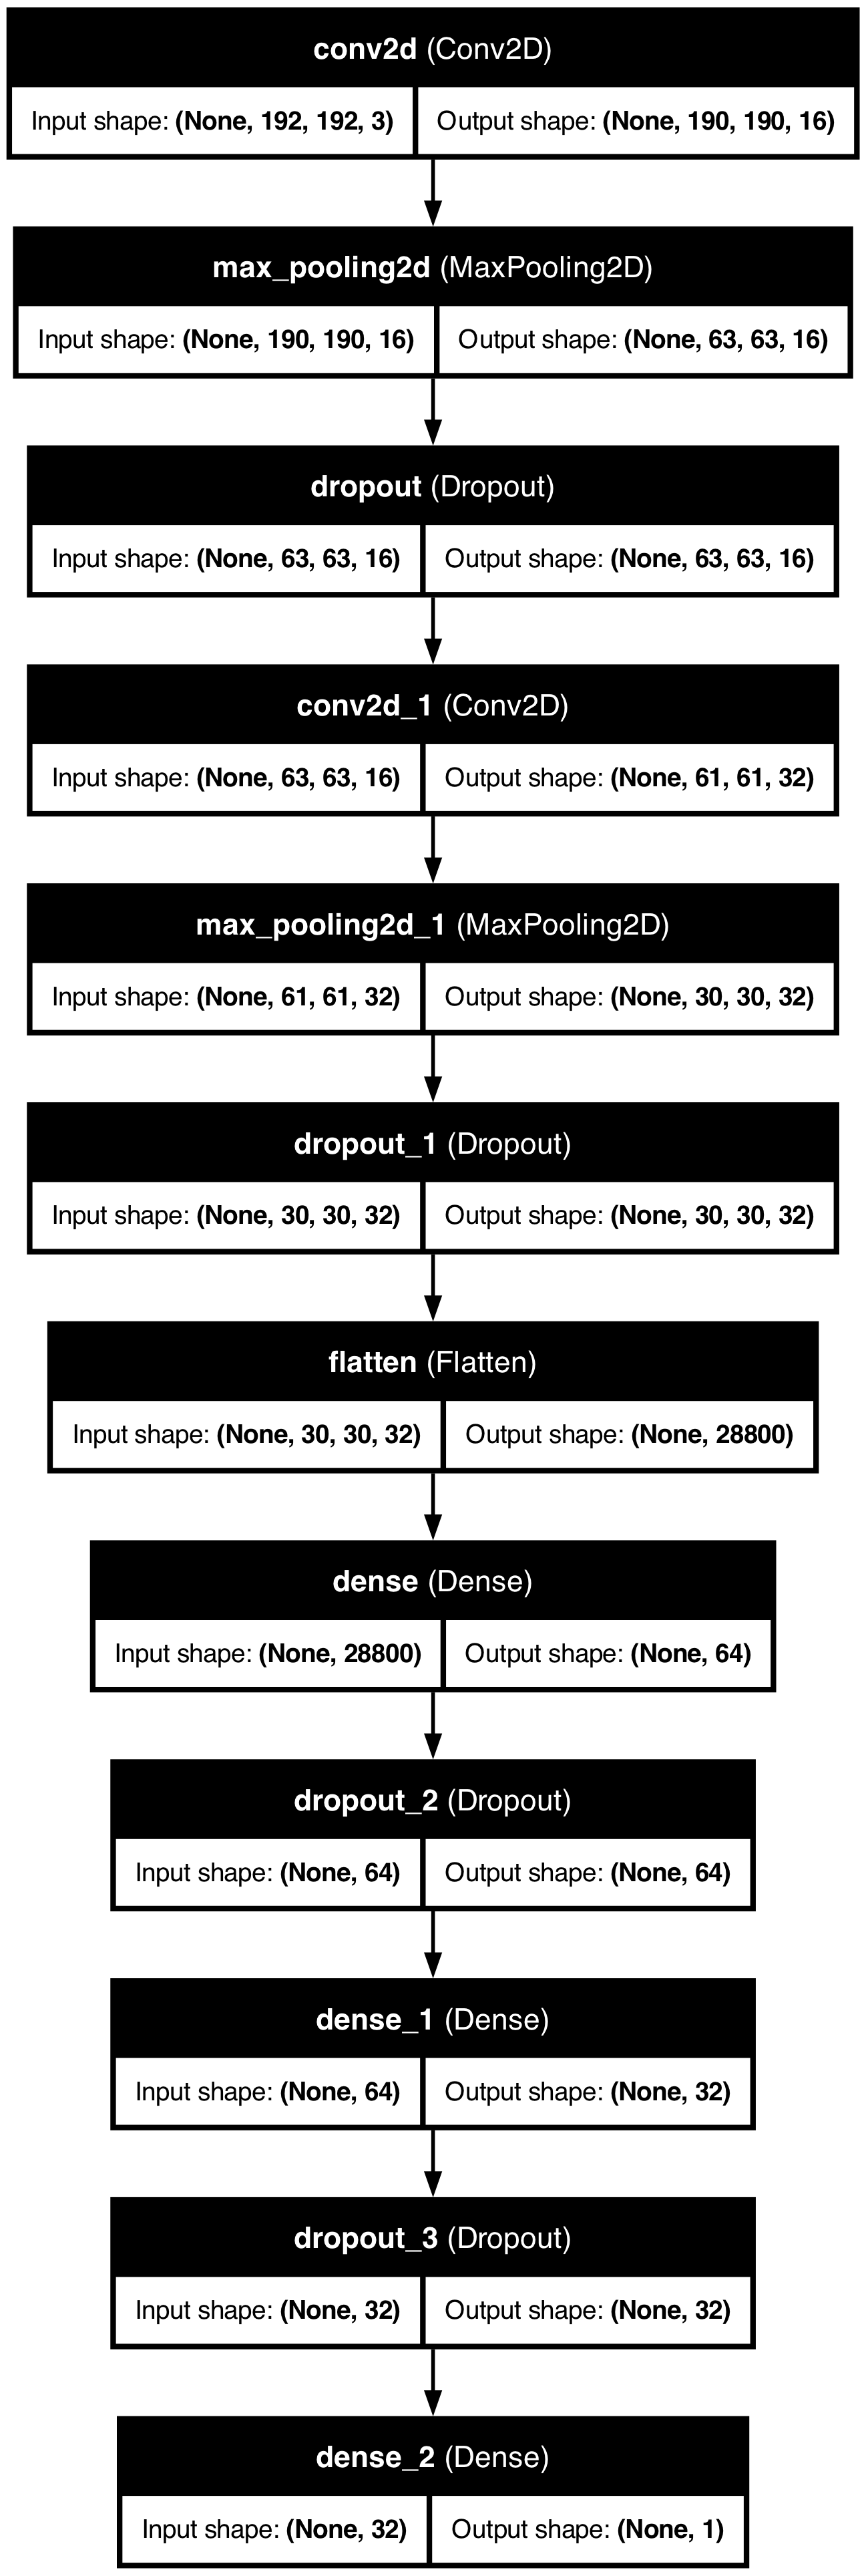

In [5]:
from keras.utils import plot_model
plot_model(model_7, show_shapes=True, show_layer_names=True)

In [20]:
# compiling model
model_7.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
early_stop = EarlyStopping(monitor='val_loss', patience=2)
fitting = model_7.fit(train,
                    validation_data=val,
                    epochs=15,
                    callbacks=early_stop)

Epoch 1/15
559/559 ━━━━━━━━━━━━━━━━━━━━ 53s 93ms/step - accuracy: 0.6003 - loss: 0.6695 - val_accuracy: 0.9116 - val_loss: 0.2947
Epoch 2/15
559/559 ━━━━━━━━━━━━━━━━━━━━ 51s 91ms/step - accuracy: 0.9163 - loss: 0.2974 - val_accuracy: 0.9244 - val_loss: 0.2300
Epoch 3/15
559/559 ━━━━━━━━━━━━━━━━━━━━ 50s 90ms/step - accuracy: 0.9401 - loss: 0.1965 - val_accuracy: 0.9210 - val_loss: 0.1876
Epoch 4/15
559/559 ━━━━━━━━━━━━━━━━━━━━ 50s 89ms/step - accuracy: 0.9494 - loss: 0.1636 - val_accuracy: 0.9329 - val_loss: 0.1829
Epoch 5/15
559/559 ━━━━━━━━━━━━━━━━━━━━ 51s 90ms/step - accuracy: 0.9569 - loss: 0.1347 - val_accuracy: 0.9358 - val_loss: 0.2155
Epoch 6/15
559/559 ━━━━━━━━━━━━━━━━━━━━ 50s 89ms/step - accuracy: 0.9642 - loss: 0.1102 - val_accuracy: 0.9342 - val_loss: 0.1892


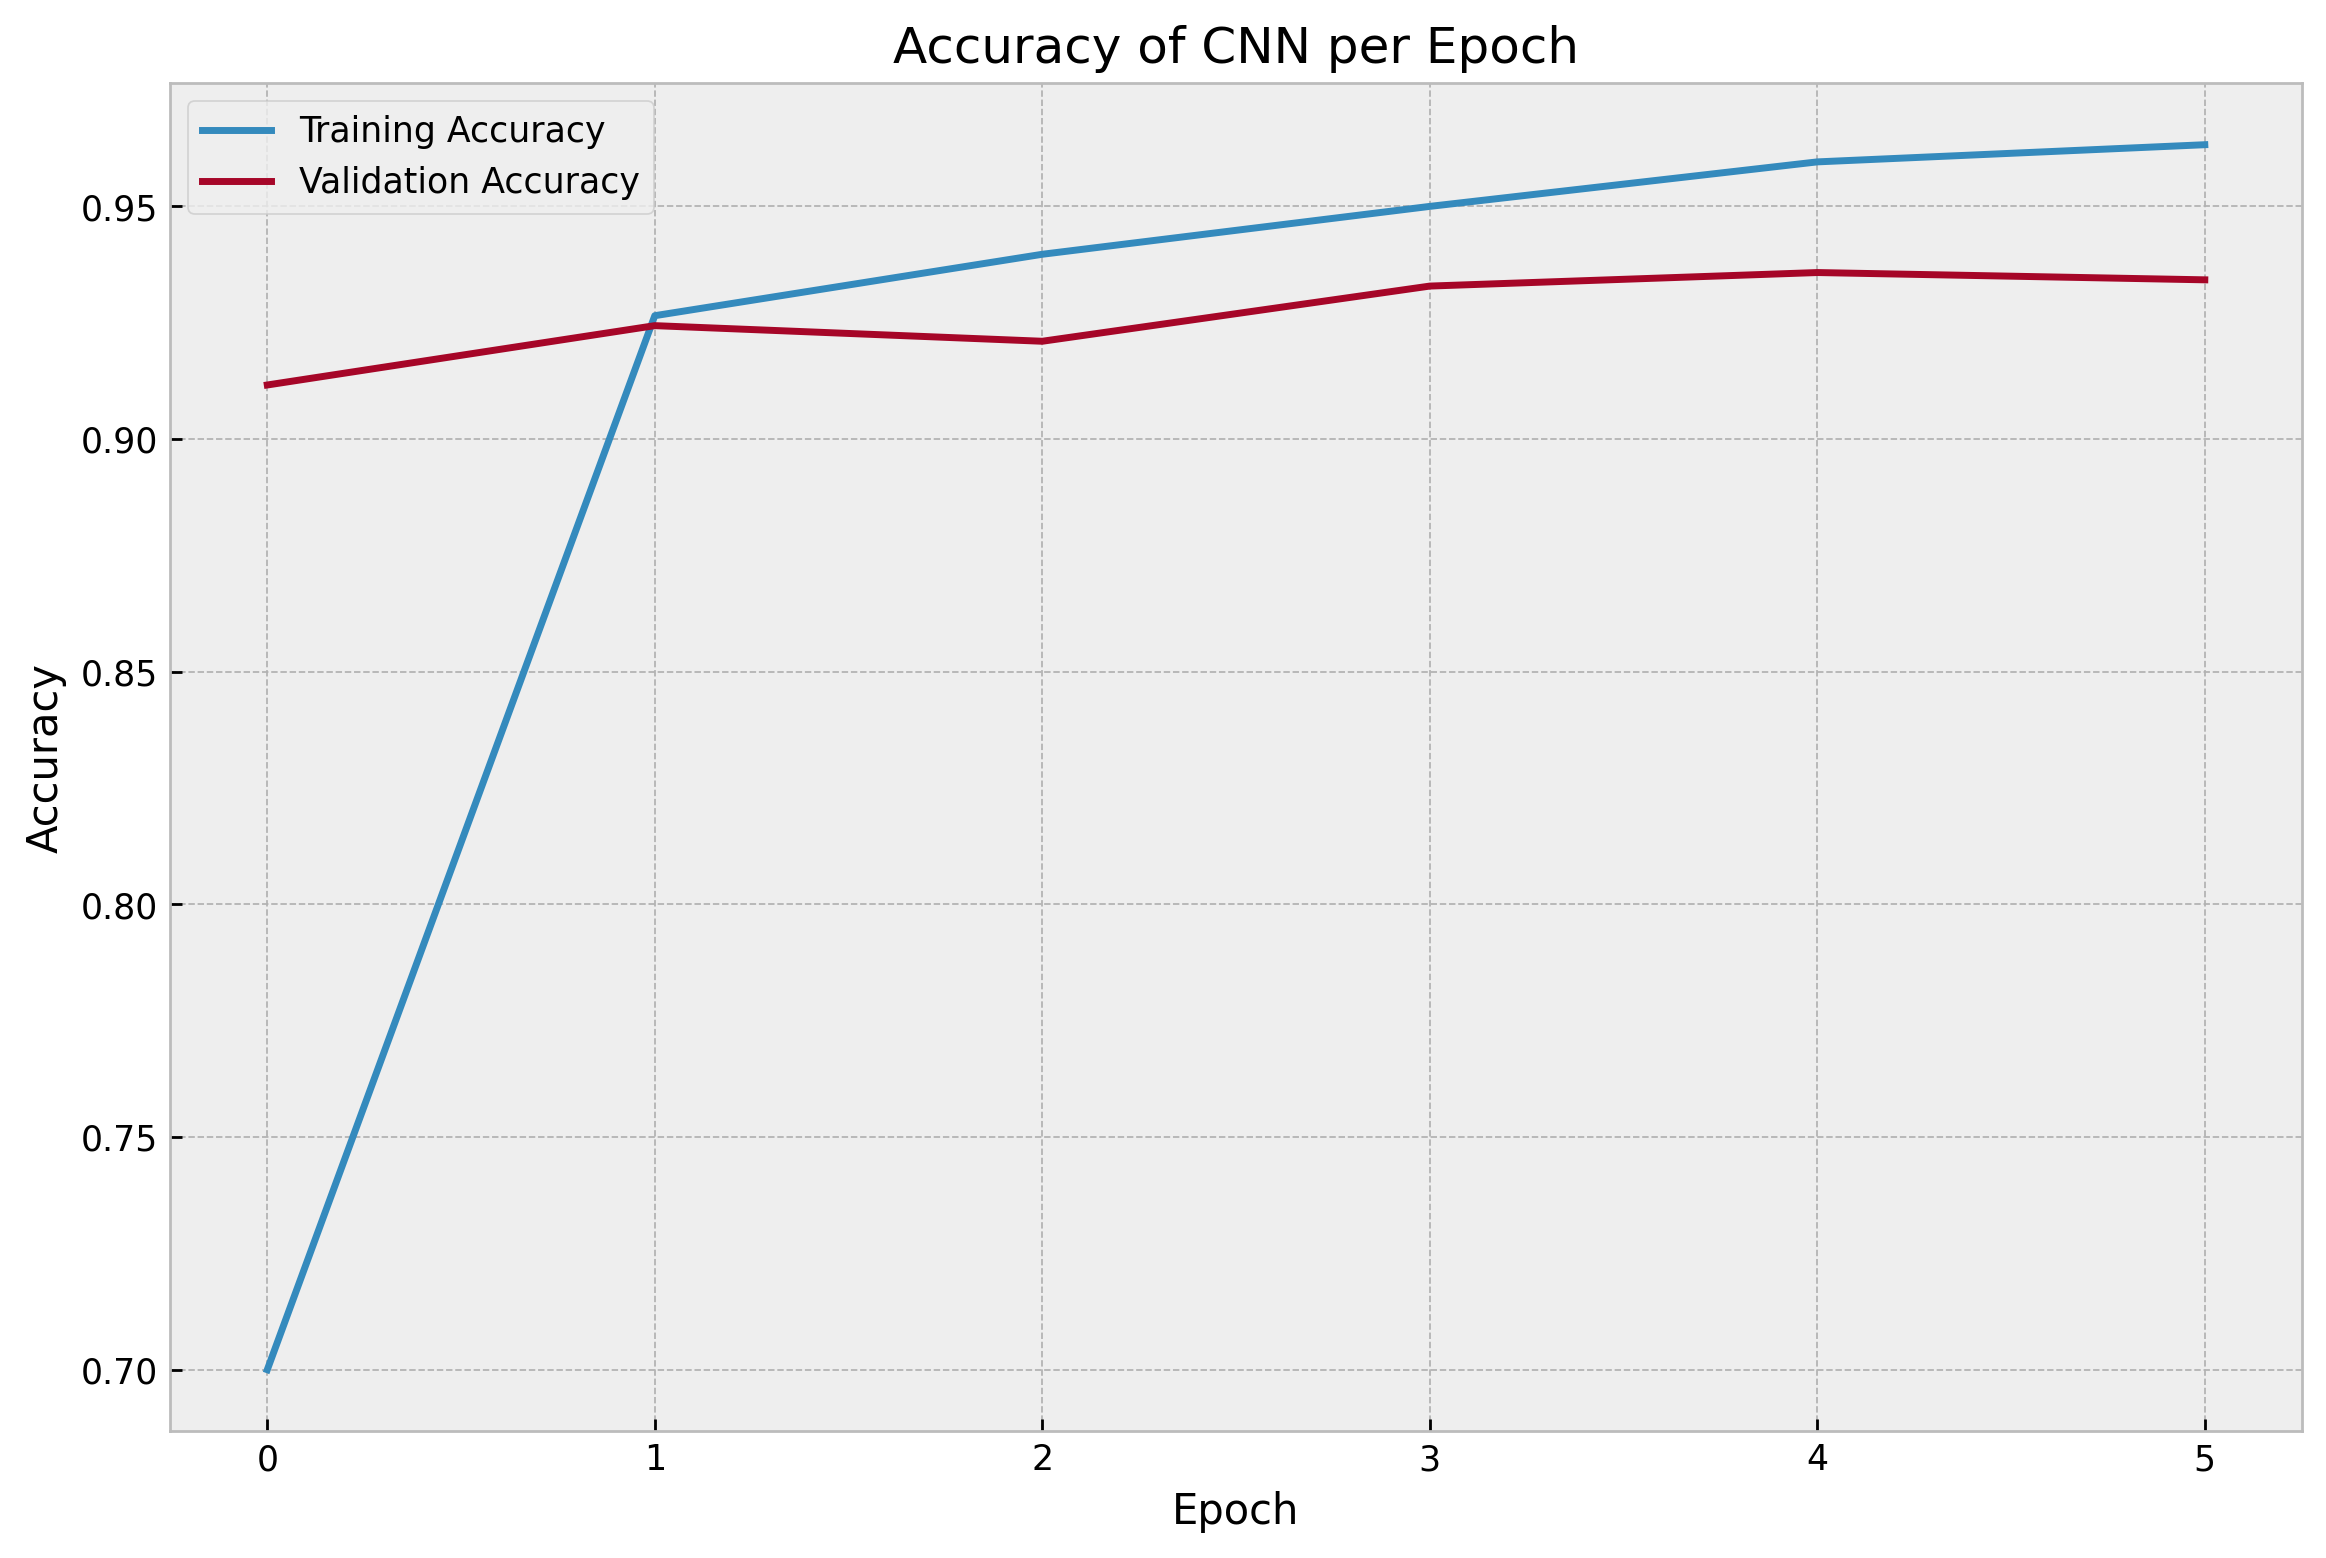

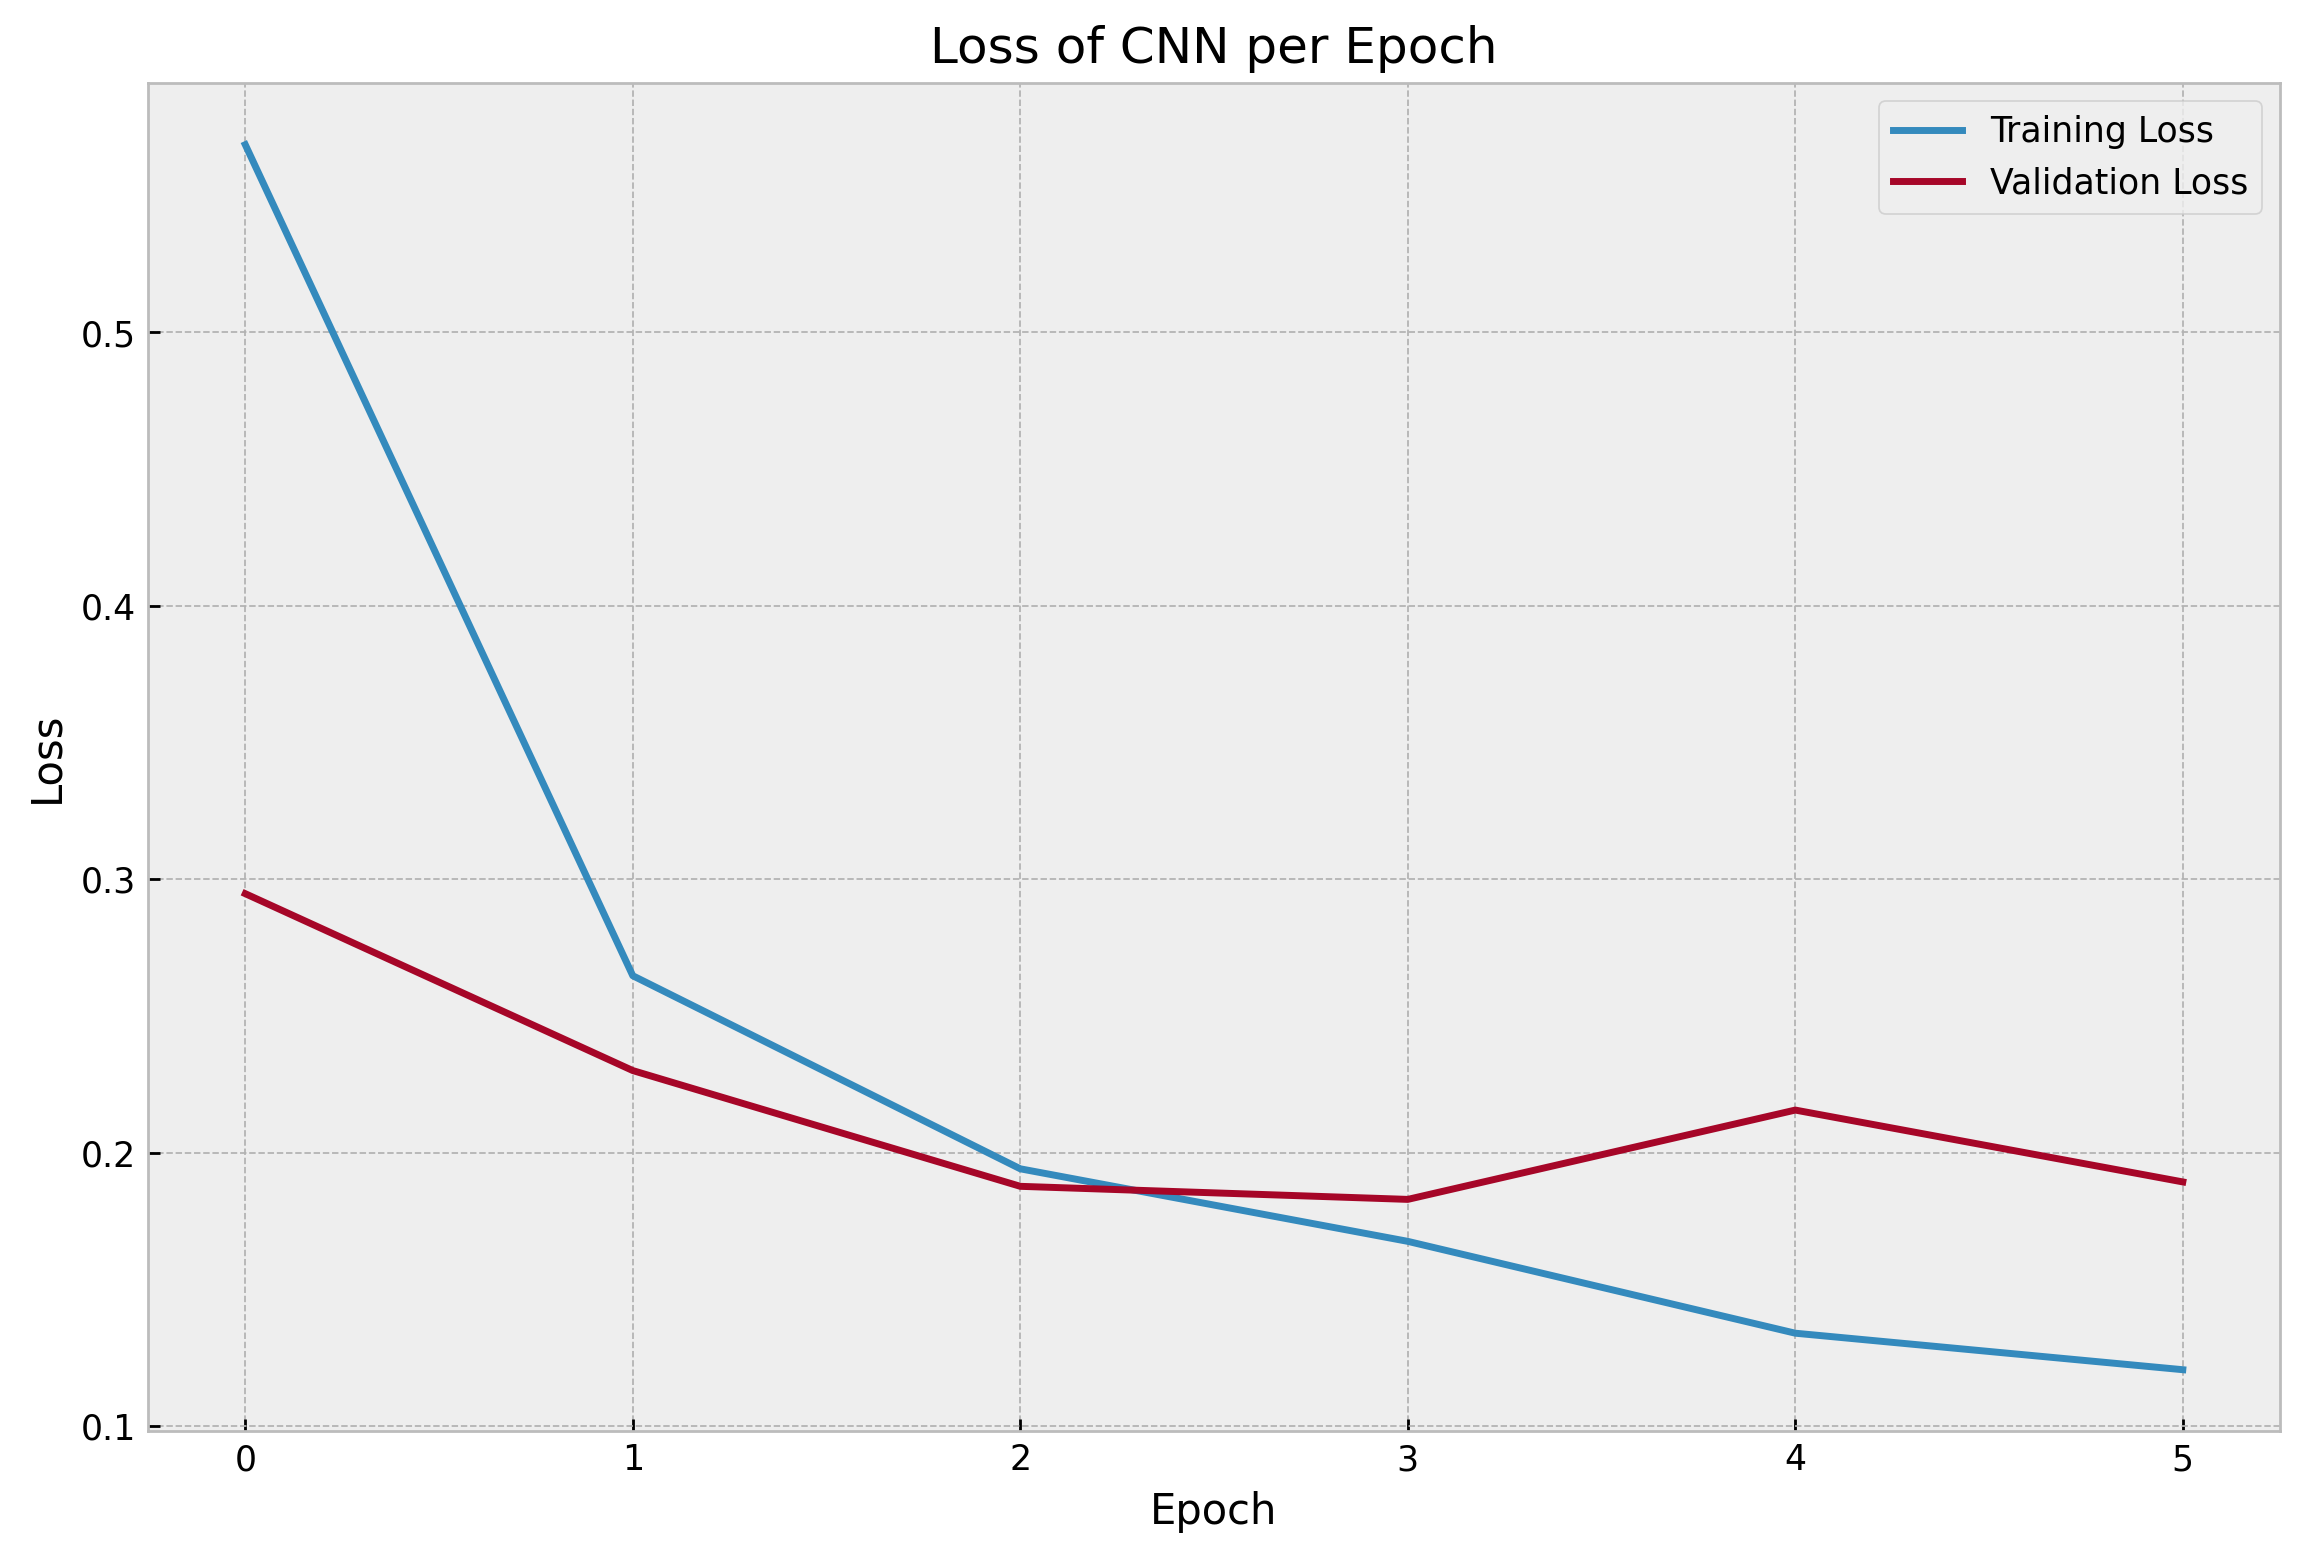

In [21]:
# plotting the accuracy and loss of the model
plt.figure(figsize=(11,7), dpi=250)
sns.lineplot(fitting.history['accuracy'], label= "Training Accuracy")
sns.lineplot(fitting.history['val_accuracy'], label= "Validation Accuracy")
plt.title("Accuracy of CNN per Epoch")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()
plt.figure(figsize=(11,7), dpi=250)
sns.lineplot(fitting.history['loss'], label= "Training Loss")
sns.lineplot(fitting.history['val_loss'], label= "Validation Loss")
plt.title("Loss of CNN per Epoch")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

Testing Image Predictions
---

1/1 ━━━━━━━━━━━━━━━━━━━━ 28s 28s/step
Chi-Square Statistic: 4341.766761235982
P-value: 0.0
Accuracy: 94.4%
False Positive Rate: 5.7%
False Negative Rate: 5.5%


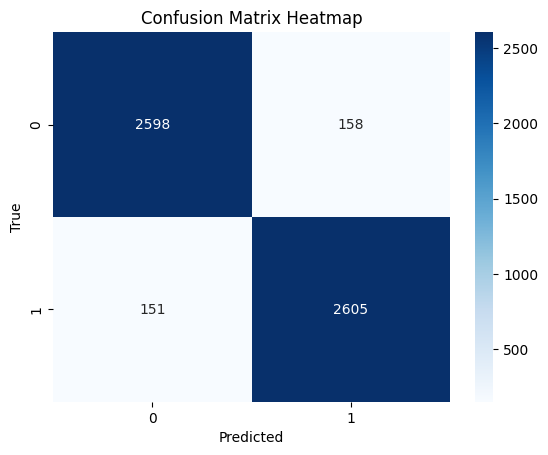

In [22]:
from sklearn.metrics import confusion_matrix
from scipy.stats import chi2_contingency
# saving model
model_7.save("CNN_model.h5")
model_7.save("CNN_model.keras")
# confusion matrix
true_labels = test[0][1]
predictions = model_7.predict(test)
cm = confusion_matrix(true_labels, np.round(predictions))
# chi-square test
chi2_statistic, p_value, _, _ = chi2_contingency(cm)
print(f"Chi-Square Statistic: {chi2_statistic}")
print(f"P-value: {p_value}")
# summary stats
accuracy = (cm[0, 0] + cm[1, 1]) / np.sum(cm)
false_positive_rate = cm[0, 1] / (cm[0, 1] + cm[1, 1])
false_negative_rate = cm[1, 0] / (cm[0, 0] + cm[1, 0])
print(f"Accuracy: {accuracy * 100:.1f}%")
print(f"False Positive Rate: {false_positive_rate * 100:.1f}%")
print(f"False Negative Rate: {false_negative_rate * 100:.1f}%")
# heatmap
plt.style.use("default")
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix Heatmap')
plt.show()